<a href="https://colab.research.google.com/github/alsh626626/CE888/blob/main/Lab_6/Lab_6_Exercise_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
df_Country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_dict = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
Xs = df_Country.loc[:, df_Country.columns != 'country'].to_numpy()
print(Xs.shape)

(167, 9)


In [ ]:
# Fit K-Means Clustering on country data
km=cluster.KMeans(n_clusters=3)
km.fit(Xs)
ys = km.labels_

In [ ]:
df_Country['Categories'] = ys
df_Country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Categories
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(Xs)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

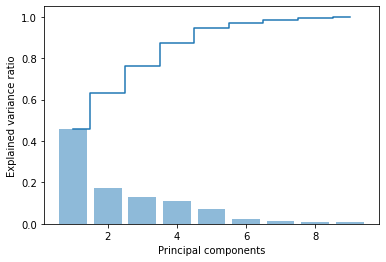

In [ ]:
plt.bar(range(1, 10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

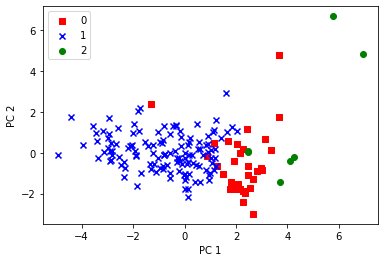

In [ ]:
# Plot of two best principal components using y data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(ys), colors, markers):
    plt.scatter(X_pca[ys == l, 0], 
          X_pca[ys == l, 1], 
          c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [ ]:
most_important_index = [np.abs(pca.components_[i]).argmax() for i in range(2)]
column_name = list(df_Country.columns)[1:-1]
most_important_feature = [column_name[most_important_index[i]] for i in range(2)]
print(most_important_feature)

['life_expec', 'imports']


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_pca, ys) # Train a Logistic regression model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


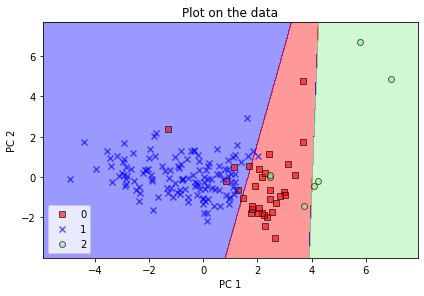

In [ ]:
plot_decision_regions(X_pca, ys, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the data')
plt.show()

In [ ]:
Categories0 = df_Country[df_Country.Categories == 0]['country'].tolist()
Categories1 = df_Country[df_Country.Categories == 1]['country'].tolist()
Categories2 = df_Country[df_Country.Categories == 2]['country'].tolist()

In [ ]:
print(len(Categories0))
print(len(Categories1))
print(len(Categories2))

32
128
7


In [ ]:
print(Categories0)
print(Categories1)
print(Categories2)

['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Malta', 'Netherlands', 'New Zealand', 'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'United States']
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada'